In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('credit_risk_dataset.csv')
df = data.copy()

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.corr(numeric_only=True)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


In [6]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
df.person_emp_length.fillna(df.person_emp_length.mean(), inplace=True)

In [9]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [10]:
df.dropna(inplace=True)
#df.loan_int_rate.fillna(df.loan_int_rate.mean(), inplace=True) worst correlation!!

In [11]:
df.isna().any()

person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length             False
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                 False
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool

In [12]:
df.duplicated().sum()

144

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [16]:
df.corr(numeric_only=True)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.177318,0.163552,0.053939,0.011760,-0.022613,-0.041981,0.859882
person_income,0.177318,1.000000,0.135491,0.268223,0.000878,-0.144499,-0.252973,0.115732
person_emp_length,0.163552,0.135491,1.000000,0.109603,-0.055620,-0.081311,-0.054010,0.144651
loan_amnt,0.053939,0.268223,0.109603,1.000000,0.146937,0.107103,0.573016,0.045233
loan_int_rate,0.011760,0.000878,-0.055620,0.146937,1.000000,0.335853,0.120207,0.015896
loan_status,-0.022613,-0.144499,-0.081311,0.107103,0.335853,1.000000,0.379540,-0.015119
loan_percent_income,-0.041981,-0.252973,-0.054010,0.573016,0.120207,0.379540,1.000000,-0.030276
cb_person_cred_hist_length,0.859882,0.115732,0.144651,0.045233,0.015896,-0.015119,-0.030276,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29321 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  29321 non-null  int64  
 1   person_income               29321 non-null  int64  
 2   person_home_ownership       29321 non-null  object 
 3   person_emp_length           29321 non-null  float64
 4   loan_intent                 29321 non-null  object 
 5   loan_grade                  29321 non-null  object 
 6   loan_amnt                   29321 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 29321 non-null  int64  
 9   loan_percent_income         29321 non-null  float64
 10  cb_person_default_on_file   29321 non-null  object 
 11  cb_person_cred_hist_length  29321 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.9+ MB


In [18]:
#detecting outliers

<Axes: >

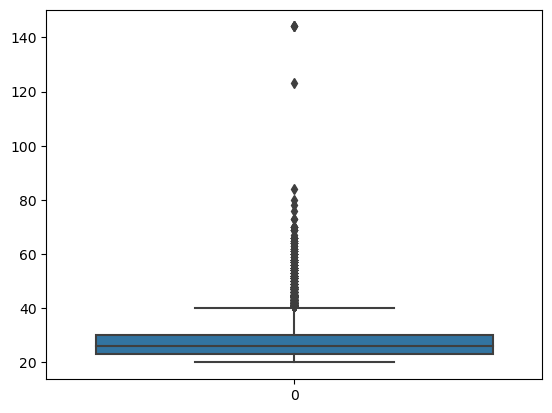

In [19]:
sns.boxplot(df.person_age)

In [20]:
df.loc[df.person_age > 30 ,"person_age"].count()

6989

In [21]:
df.loc[df['person_age']>(30+1.5*7),"person_age"] = (30+1.5*7)

C:\Users\Ömer\AppData\Local\Temp\ipykernel_1500\3213583188.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '40.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['person_age']>(30+1.5*7),"person_age"] = (30+1.5*7)


In [22]:
df.corr(numeric_only=True)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.127558,0.177741,0.059858,0.012966,-0.026957,-0.044370,0.858537
person_income,0.127558,1.000000,0.135491,0.268223,0.000878,-0.144499,-0.252973,0.115732
person_emp_length,0.177741,0.135491,1.000000,0.109603,-0.055620,-0.081311,-0.054010,0.144651
loan_amnt,0.059858,0.268223,0.109603,1.000000,0.146937,0.107103,0.573016,0.045233
loan_int_rate,0.012966,0.000878,-0.055620,0.146937,1.000000,0.335853,0.120207,0.015896
loan_status,-0.026957,-0.144499,-0.081311,0.107103,0.335853,1.000000,0.379540,-0.015119
loan_percent_income,-0.044370,-0.252973,-0.054010,0.573016,0.120207,0.379540,1.000000,-0.030276
cb_person_cred_hist_length,0.858537,0.115732,0.144651,0.045233,0.015896,-0.015119,-0.030276,1.000000


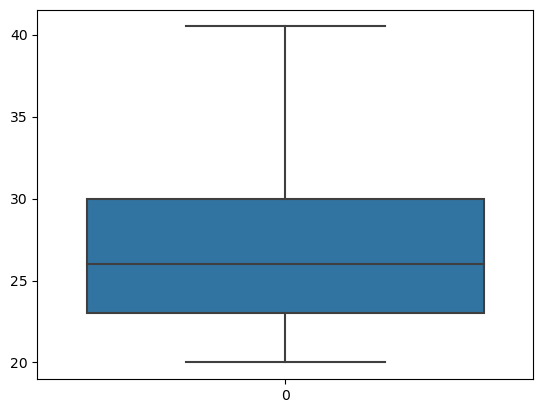

In [23]:
sns.boxplot(df['person_age'])
plt.show()

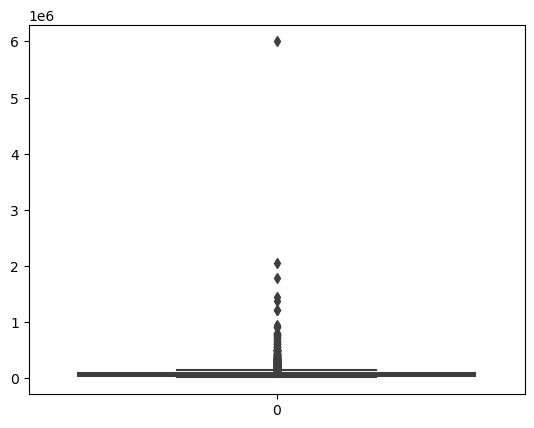

In [24]:
sns.boxplot(df.person_income)
plt.show()

In [25]:
df.loc[df['person_income']>(df.person_income.quantile(0.75)+1.5*(df.person_income.quantile(0.75) - df.person_income.quantile(0.25))),"person_income"] = (df.person_income.quantile(0.75)+1.5*(df.person_income.quantile(0.75) - df.person_income.quantile(0.25)))

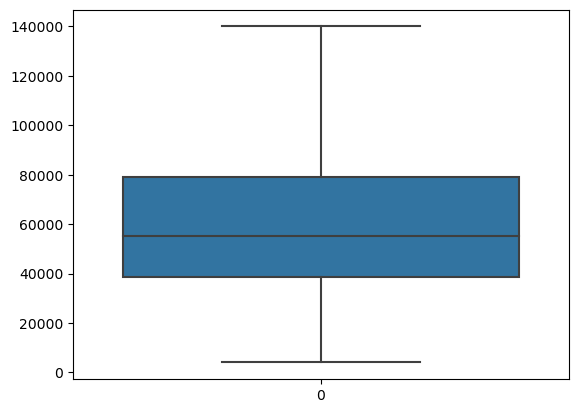

In [26]:
sns.boxplot(df.person_income)
plt.show()

In [27]:
df.corr(numeric_only=True) # person_income correlation loan status 0.14 ->>> 0.24

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.129559,0.177741,0.059858,0.012966,-0.026957,-0.044370,0.858537
person_income,0.129559,1.000000,0.195906,0.420169,-0.018114,-0.244687,-0.366338,0.095609
person_emp_length,0.177741,0.195906,1.000000,0.109603,-0.055620,-0.081311,-0.054010,0.144651
loan_amnt,0.059858,0.420169,0.109603,1.000000,0.146937,0.107103,0.573016,0.045233
loan_int_rate,0.012966,-0.018114,-0.055620,0.146937,1.000000,0.335853,0.120207,0.015896
loan_status,-0.026957,-0.244687,-0.081311,0.107103,0.335853,1.000000,0.379540,-0.015119
loan_percent_income,-0.044370,-0.366338,-0.054010,0.573016,0.120207,0.379540,1.000000,-0.030276
cb_person_cred_hist_length,0.858537,0.095609,0.144651,0.045233,0.015896,-0.015119,-0.030276,1.000000


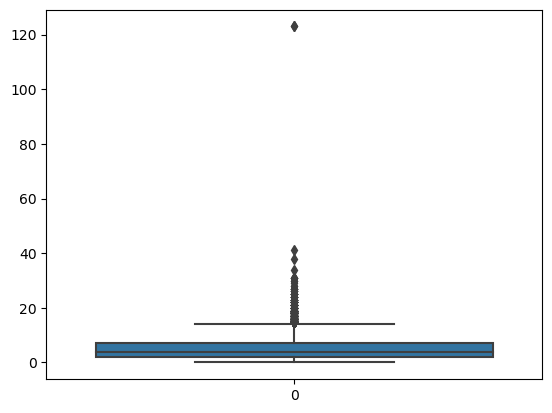

In [28]:
sns.boxplot(df['person_emp_length'])
plt.show()

In [29]:
df.loc[df['person_emp_length']>(7+1.5*5),"person_emp_length"] = (7+1.5*5)

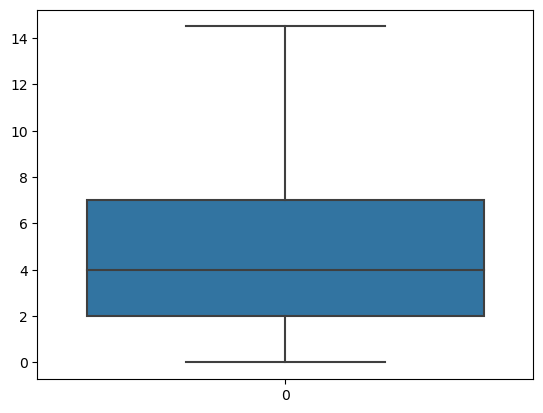

In [30]:
sns.boxplot(df['person_emp_length'])
plt.show()

In [31]:
df.corr(numeric_only=True)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.129559,0.158195,0.059858,0.012966,-0.026957,-0.044370,0.858537
person_income,0.129559,1.000000,0.203261,0.420169,-0.018114,-0.244687,-0.366338,0.095609
person_emp_length,0.158195,0.203261,1.000000,0.109936,-0.060586,-0.089432,-0.059330,0.123381
loan_amnt,0.059858,0.420169,0.109936,1.000000,0.146937,0.107103,0.573016,0.045233
loan_int_rate,0.012966,-0.018114,-0.060586,0.146937,1.000000,0.335853,0.120207,0.015896
loan_status,-0.026957,-0.244687,-0.089432,0.107103,0.335853,1.000000,0.379540,-0.015119
loan_percent_income,-0.044370,-0.366338,-0.059330,0.573016,0.120207,0.379540,1.000000,-0.030276
cb_person_cred_hist_length,0.858537,0.095609,0.123381,0.045233,0.015896,-0.015119,-0.030276,1.000000


In [32]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
df['loan_grade'] = le.fit_transform(df['loan_grade'])

In [34]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000,RENT,14.5,PERSONAL,3,35000,16.02,1,0.59,Y,3
1,21.0,9600,OWN,5.0,EDUCATION,1,1000,11.14,0,0.10,N,2
2,25.0,9600,MORTGAGE,1.0,MEDICAL,2,5500,12.87,1,0.57,N,3
3,23.0,65500,RENT,4.0,MEDICAL,2,35000,15.23,1,0.53,N,2
4,24.0,54400,RENT,8.0,MEDICAL,2,35000,14.27,1,0.55,Y,4


In [35]:
df.corr(numeric_only= True)

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.129559,0.158195,0.015467,0.059858,0.012966,-0.026957,-0.044370,0.858537
person_income,0.129559,1.000000,0.203261,-0.013682,0.420169,-0.018114,-0.244687,-0.366338,0.095609
person_emp_length,0.158195,0.203261,1.000000,-0.053975,0.109936,-0.060586,-0.089432,-0.059330,0.123381
loan_grade,0.015467,-0.013682,-0.053975,1.000000,0.151146,0.933721,0.376365,0.123161,0.015015
loan_amnt,0.059858,0.420169,0.109936,0.151146,1.000000,0.146937,0.107103,0.573016,0.045233
loan_int_rate,0.012966,-0.018114,-0.060586,0.933721,0.146937,1.000000,0.335853,0.120207,0.015896
loan_status,-0.026957,-0.244687,-0.089432,0.376365,0.107103,0.335853,1.000000,0.379540,-0.015119
loan_percent_income,-0.044370,-0.366338,-0.059330,0.123161,0.573016,0.120207,0.379540,1.000000,-0.030276
cb_person_cred_hist_length,0.858537,0.095609,0.123381,0.015015,0.045233,0.015896,-0.015119,-0.030276,1.000000


In [36]:
df.person_home_ownership.value_counts()

person_home_ownership
RENT        14838
MORTGAGE    12054
OWN          2336
OTHER          93
Name: count, dtype: int64

In [37]:
mapping = {'OWN': 0, 'MORTGAGE':1, 'RENT':3, 'OTHER':2}

In [38]:
df['person_home_ownership'] = df['person_home_ownership'].map(mapping)

In [39]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000,3,14.5,PERSONAL,3,35000,16.02,1,0.59,Y,3
1,21.0,9600,0,5.0,EDUCATION,1,1000,11.14,0,0.10,N,2
2,25.0,9600,1,1.0,MEDICAL,2,5500,12.87,1,0.57,N,3
3,23.0,65500,3,4.0,MEDICAL,2,35000,15.23,1,0.53,N,2
4,24.0,54400,3,8.0,MEDICAL,2,35000,14.27,1,0.55,Y,4


In [40]:
df.corr(numeric_only= True)

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.129559,-0.037051,0.158195,0.015467,0.059858,0.012966,-0.026957,-0.044370,0.858537
person_income,0.129559,1.000000,-0.240022,0.203261,-0.013682,0.420169,-0.018114,-0.244687,-0.366338,0.095609
person_home_ownership,-0.037051,-0.240022,1.000000,-0.224876,0.113022,-0.096602,0.128525,0.241742,0.095296,-0.025530
person_emp_length,0.158195,0.203261,-0.224876,1.000000,-0.053975,0.109936,-0.060586,-0.089432,-0.059330,0.123381
loan_grade,0.015467,-0.013682,0.113022,-0.053975,1.000000,0.151146,0.933721,0.376365,0.123161,0.015015
loan_amnt,0.059858,0.420169,-0.096602,0.109936,0.151146,1.000000,0.146937,0.107103,0.573016,0.045233
loan_int_rate,0.012966,-0.018114,0.128525,-0.060586,0.933721,0.146937,1.000000,0.335853,0.120207,0.015896
loan_status,-0.026957,-0.244687,0.241742,-0.089432,0.376365,0.107103,0.335853,1.000000,0.379540,-0.015119
loan_percent_income,-0.044370,-0.366338,0.095296,-0.059330,0.123161,0.573016,0.120207,0.379540,1.000000,-0.030276
cb_person_cred_hist_length,0.858537,0.095609,-0.025530,0.123381,0.015015,0.045233,0.015896,-0.015119,-0.030276,1.000000


In [41]:
df.loan_intent.value_counts()

loan_intent
EDUCATION            5820
MEDICAL              5426
VENTURE              5119
PERSONAL             4994
DEBTCONSOLIDATION    4683
HOMEIMPROVEMENT      3279
Name: count, dtype: int64

In [42]:
df.cb_person_default_on_file.value_counts()

cb_person_default_on_file
N    24122
Y     5199
Name: count, dtype: int64

In [43]:
df.cb_person_default_on_file = le.fit_transform(df.cb_person_default_on_file)

In [44]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000,3,14.5,PERSONAL,3,35000,16.02,1,0.59,1,3
1,21.0,9600,0,5.0,EDUCATION,1,1000,11.14,0,0.10,0,2
2,25.0,9600,1,1.0,MEDICAL,2,5500,12.87,1,0.57,0,3
3,23.0,65500,3,4.0,MEDICAL,2,35000,15.23,1,0.53,0,2
4,24.0,54400,3,8.0,MEDICAL,2,35000,14.27,1,0.55,1,4


In [45]:
df = df.join(pd.get_dummies(df.loan_intent, prefix ='loan_intent',dtype=int)).drop('loan_intent', axis=1)

In [46]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,59000,3,14.5,3,35000,16.02,1,0.59,1,3,0,0,0,0,1,0
1,21.0,9600,0,5.0,1,1000,11.14,0,0.10,0,2,0,1,0,0,0,0
2,25.0,9600,1,1.0,2,5500,12.87,1,0.57,0,3,0,0,0,1,0,0
3,23.0,65500,3,4.0,2,35000,15.23,1,0.53,0,2,0,0,0,1,0,0
4,24.0,54400,3,8.0,2,35000,14.27,1,0.55,1,4,0,0,0,1,0,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29321 entries, 0 to 32580
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person_age                     29321 non-null  float64
 1   person_income                  29321 non-null  int64  
 2   person_home_ownership          29321 non-null  int64  
 3   person_emp_length              29321 non-null  float64
 4   loan_grade                     29321 non-null  int32  
 5   loan_amnt                      29321 non-null  int64  
 6   loan_int_rate                  29321 non-null  float64
 7   loan_status                    29321 non-null  int64  
 8   loan_percent_income            29321 non-null  float64
 9   cb_person_default_on_file      29321 non-null  int32  
 10  cb_person_cred_hist_length     29321 non-null  int64  
 11  loan_intent_DEBTCONSOLIDATION  29321 non-null  int32  
 12  loan_intent_EDUCATION          29321 non-null  int3

In [48]:
df.corr()

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
person_age,1.000000,0.129559,-0.037051,0.158195,0.015467,0.059858,0.012966,-0.026957,-0.044370,0.010735,0.858537,-0.004053,-0.099495,0.092582,0.019183,0.018612,-0.006464
person_income,0.129559,1.000000,-0.240022,0.203261,-0.013682,0.420169,-0.018114,-0.244687,-0.366338,-0.013814,0.095609,0.001116,-0.014934,0.080412,-0.065392,0.008343,0.006490
person_home_ownership,-0.037051,-0.240022,1.000000,-0.224876,0.113022,-0.096602,0.128525,0.241742,0.095296,0.057591,-0.025530,0.053061,0.000135,-0.055566,0.056927,-0.012625,-0.050950
person_emp_length,0.158195,0.203261,-0.224876,1.000000,-0.053975,0.109936,-0.060586,-0.089432,-0.059330,-0.031727,0.123381,0.000888,-0.035240,0.030266,-0.005692,0.011135,0.005839
loan_grade,0.015467,-0.013682,0.113022,-0.053975,1.000000,0.151146,0.933721,0.376365,0.123161,0.536075,0.015015,-0.003338,-0.010392,0.029001,0.004220,-0.004183,-0.010112
loan_amnt,0.059858,0.420169,-0.096602,0.109936,0.151146,1.000000,0.146937,0.107103,0.573016,0.040552,0.045233,0.000656,-0.008782,0.041138,-0.024464,0.000855,-0.001380
loan_int_rate,0.012966,-0.018114,0.128525,-0.060586,0.933721,0.146937,1.000000,0.335853,0.120207,0.500980,0.015896,-0.003722,-0.009604,0.020999,0.006961,-0.001851,-0.009039
loan_status,-0.026957,-0.244687,0.241742,-0.089432,0.376365,0.107103,0.335853,1.000000,0.379540,0.180600,-0.015119,0.070614,-0.056334,0.036817,0.058260,-0.019984,-0.079330
loan_percent_income,-0.044370,-0.366338,0.095296,-0.059330,0.123161,0.573016,0.120207,0.379540,1.000000,0.035944,-0.030276,0.003729,-0.000062,-0.018324,0.014293,-0.003396,0.000421
cb_person_default_on_file,0.010735,-0.013814,0.057591,-0.031727,0.536075,0.040552,0.500980,0.180600,0.035944,1.000000,0.008411,-0.000818,-0.006708,0.015184,0.000437,-0.002257,-0.002979


## Training  Classification Model

In [49]:
X, y = df.drop('loan_status', axis =1), df.loan_status

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8891667613959304
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      6850
           1       0.74      0.76      0.75      1947

    accuracy                           0.89      8797
   macro avg       0.84      0.84      0.84      8797
weighted avg       0.89      0.89      0.89      8797



In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9327043310219393
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6850
           1       0.97      0.72      0.83      1947

    accuracy                           0.93      8797
   macro avg       0.95      0.86      0.89      8797
weighted avg       0.94      0.93      0.93      8797



In [53]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)


print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.8070933272706604
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6850
           1       0.74      0.20      0.31      1947

    accuracy                           0.81      8797
   macro avg       0.78      0.59      0.60      8797
weighted avg       0.80      0.81      0.76      8797



In [54]:
from sklearn.svm import SVC


svm = SVC()
svm.fit(X_train, y_train)


y_pred_svm = svm.predict(X_test)


print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8122087075139252
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      6850
           1       0.80      0.20      0.32      1947

    accuracy                           0.81      8797
   macro avg       0.81      0.59      0.61      8797
weighted avg       0.81      0.81      0.77      8797



In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8390360350119359
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6850
           1       0.73      0.43      0.54      1947

    accuracy                           0.84      8797
   macro avg       0.79      0.69      0.72      8797
weighted avg       0.83      0.84      0.82      8797



In [56]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM','KNN']
accuracies = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_knn)
]


for model, accuracy in zip(models, accuracies):
    print(f"{model}: {accuracy:.4f}")

Logistic Regression: 0.8071
Decision Tree: 0.8892
Random Forest: 0.9327
SVM: 0.8122
KNN: 0.8390


In [57]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM','KNN']
accuracies = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_knn)
]


for model, accuracy in zip(models, accuracies):
    print(f"{model}: {accuracy:.4f}")

Logistic Regression: 0.8071
Decision Tree: 0.8892
Random Forest: 0.9327
SVM: 0.8122
KNN: 0.8390


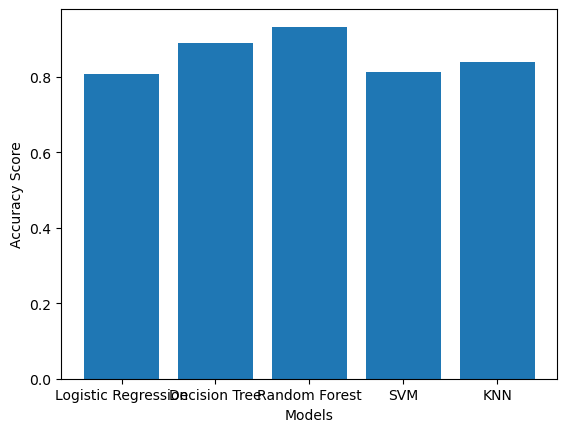

In [58]:
plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}




grid_search = GridSearchCV(estimator=RandomForestClassifier(), 
                           param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)


best_rf_model = grid_search.best_estimator_


y_pred_best_rf = best_rf_model.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Accuracy: 0.9332727066045242
